# Training a Latin SBERT model
This notebook details the training of the Latin SBERT model to produce historical sentence embeddings. 
* Details on training an SBERT model can be found here: https://www.sbert.net/docs/training/overview.html

In [1]:
import numpy as np
import os, re
from sentence_transformers import SentenceTransformer, models
import torch

torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
path_to_latin_bert_tokenizer = os.getcwd()+"/src/utils/LatinBERT/"
path_to_latin_bert = os.getcwd()+"/src/utils/LatinBERT/latin_bert/"

In [4]:
from src import data

In [5]:
training_data = data.prepare_data_for_sbert_training(os.path.join(os.getcwd(),"data"))

Filename                       | Amount used | Amount Skipped
la_udante-ud-dev.conllu        :       376.0 :            1.0
la_udante-ud-test.conllu       :       419.0 :            0.0
la_udante-ud-train.conllu      :       926.0 :            0.0
la_ittb-ud-dev.conllu          :      2101.0 :          155.0
la_ittb-ud-test.conllu         :      2101.0 :          232.0
la_ittb-ud-train.conllu        :     22775.0 :         1668.0
la_llct-ud-dev.conllu          :       850.0 :           98.0
la_llct-ud-test.conllu         :       884.0 :          154.0
la_llct-ud-train.conllu        :      7289.0 :         1115.0
la_proiel-ud-dev.conllu        :      1233.0 :           14.0
la_proiel-ud-test.conllu       :      1260.0 :           30.0
la_proiel-ud-train.conllu      :     16196.0 :          758.0
la_perseus-ud-test.conllu      :       939.0 :            4.0
la_perseus-ud-train.conllu     :      1334.0 :           10.0
Total unique data : 54444 | filtered out 4239


The Latin Age sentence

In [6]:
print(len(training_data))
print(training_data[14])

50000
<InputExample> label: 0.0, texts: et responderunt se nescire unde esset; neque in obiectis, sicut neque in entibus, cum sit unum primum ens, ut supra probatum est.


In [7]:
from torch.utils.data import DataLoader
from torch import nn
from sentence_transformers import losses

In [8]:
word_embedding_model = models.Transformer(model_name_or_path=path_to_latin_bert, tokenizer_name_or_path=path_to_latin_bert_tokenizer, max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())

dense_model = models.Dense(
    in_features=pooling_model.get_sentence_embedding_dimension(),
    out_features=256,
    activation_function=nn.Tanh(),
)

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model], device="cuda")

In [ ]:
# Define your train dataset, the dataloader and the train loss
train_dataloader = DataLoader(training_data, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)

# Tune the model
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100,output_path=os.path.join(os.getcwd(),"latin_sbert"),save_best_model=True)

In [9]:
authors_to_sents = data.load_data(os.path.join(os.getcwd(),"data"))

Filename                       | Amount used | Amount Skipped
la_udante-ud-dev.conllu        :       376.0 :            1.0
la_udante-ud-test.conllu       :       419.0 :            0.0
la_udante-ud-train.conllu      :       926.0 :            0.0
la_ittb-ud-dev.conllu          :      2101.0 :          155.0
la_ittb-ud-test.conllu         :      2101.0 :          232.0
la_ittb-ud-train.conllu        :     22775.0 :         1668.0
la_llct-ud-dev.conllu          :       850.0 :           98.0
la_llct-ud-test.conllu         :       884.0 :          154.0
la_llct-ud-train.conllu        :      7289.0 :         1115.0
la_proiel-ud-dev.conllu        :      1233.0 :           14.0
la_proiel-ud-test.conllu       :      1260.0 :           30.0
la_proiel-ud-train.conllu      :     16196.0 :          758.0
la_perseus-ud-test.conllu      :       939.0 :            4.0
la_perseus-ud-train.conllu     :      1334.0 :           10.0
Total unique data : 54444 | filtered out 4239
And the number of Conllu

# Training a Latin SBERT model
This notebook details the training of the Latin SBERT model to produce historical sentence embeddings. 
* Details on training an SBERT model can be found here: https://www.sbert.net/docs/training/overview.html

In [10]:
sentences = [authors_to_sents["Caesar"][31],authors_to_sents["Aquinas"][31],authors_to_sents["Vergil"][31],authors_to_sents["Late"][31]]

In [11]:
embeddings = model.encode(sentences)

In [12]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(a,b):
    return dot(a, b)/(norm(a)*norm(b))

In [13]:
print(cos_sim(embeddings[0],embeddings[0]))
print(cos_sim(embeddings[0],embeddings[1]))
print(cos_sim(embeddings[0],embeddings[2]))
print(cos_sim(embeddings[0],embeddings[3]))

1.0000001
0.0029459337
0.8554757
0.014914944


In [14]:
print(cos_sim(embeddings[1],embeddings[0]))
print(cos_sim(embeddings[1],embeddings[1]))
print(cos_sim(embeddings[1],embeddings[2]))
print(cos_sim(embeddings[1],embeddings[3]))

0.0029459337
1.0
0.02229615
0.0042465664


In [15]:
print(cos_sim(embeddings[2],embeddings[0]))
print(cos_sim(embeddings[2],embeddings[1]))
print(cos_sim(embeddings[2],embeddings[2]))
print(cos_sim(embeddings[2],embeddings[3]))

0.8554757
0.02229615
1.0
-0.0052479166


In [16]:
print(cos_sim(embeddings[3],embeddings[0]))
print(cos_sim(embeddings[3],embeddings[1]))
print(cos_sim(embeddings[3],embeddings[2]))
print(cos_sim(embeddings[3],embeddings[3]))

0.014914944
0.0042465664
-0.0052479166
0.9999999


In [17]:
sentences = [authors_to_sents["Augustus"][31],authors_to_sents["Dante"][31],authors_to_sents["Aquinas"][3],authors_to_sents["Petronius"][31]]
embeddings = model.encode(sentences)

In [18]:
print(cos_sim(embeddings[0],embeddings[0]))
print(cos_sim(embeddings[0],embeddings[1]))
print(cos_sim(embeddings[0],embeddings[2]))
print(cos_sim(embeddings[0],embeddings[3]))

1.0
0.08341619
0.021528477
0.8574468


In [19]:
print(cos_sim(embeddings[1],embeddings[0]))
print(cos_sim(embeddings[1],embeddings[1]))
print(cos_sim(embeddings[1],embeddings[2]))
print(cos_sim(embeddings[1],embeddings[3]))

0.08341619
1.0000001
0.86723685
0.070375375


In [29]:
print(cos_sim(embeddings[2],embeddings[0]))
print(cos_sim(embeddings[2],embeddings[1]))
print(cos_sim(embeddings[2],embeddings[2]))
print(cos_sim(embeddings[2],embeddings[3]))

0.012486738
0.9772242
1.0000001
-0.018171074


In [30]:
print(cos_sim(embeddings[3],embeddings[0]))
print(cos_sim(embeddings[3],embeddings[1]))
print(cos_sim(embeddings[3],embeddings[2]))
print(cos_sim(embeddings[3],embeddings[3]))

0.83942914
-0.024533235
-0.018171074
1.0


In [19]:
sentences = [authors_to_sents["Palladius"][31],authors_to_sents["Jerome"][31],authors_to_sents["Aquinas"][3],authors_to_sents["Sallust"][31]]
embeddings = model.encode(sentences)

In [20]:
print(cos_sim(embeddings[0],embeddings[0]))
print(cos_sim(embeddings[0],embeddings[1]))
print(cos_sim(embeddings[0],embeddings[2]))
print(cos_sim(embeddings[0],embeddings[3]))

1.0
0.0014461863
-0.008164441
-0.0048352256


In [21]:
print(cos_sim(embeddings[1],embeddings[0]))
print(cos_sim(embeddings[1],embeddings[1]))
print(cos_sim(embeddings[1],embeddings[2]))
print(cos_sim(embeddings[1],embeddings[3]))

0.0014461863
0.9999999
-0.0036019385
0.77770764


In [22]:
print(cos_sim(embeddings[2],embeddings[0]))
print(cos_sim(embeddings[2],embeddings[1]))
print(cos_sim(embeddings[2],embeddings[2]))
print(cos_sim(embeddings[2],embeddings[3]))

-0.008164441
-0.0036019385
1.0000001
0.015339325


In [24]:
print(cos_sim(embeddings[3],embeddings[0]))
print(cos_sim(embeddings[3],embeddings[1]))
print(cos_sim(embeddings[3],embeddings[2]))
print(cos_sim(embeddings[3],embeddings[3]))

-0.0048352256
0.77770764
0.015339325
1.0


# Clustering the embeddings

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

### load the model

In [10]:
model = SentenceTransformer("./latin_sbert")

In [11]:
import umap.umap_ as umap
import umap.plot
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

/scratch/r.behr/llmdetect/detect_venv/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [12]:
sents_df = data.load_data(os.path.join(os.getcwd(),"data"),return_sents=True)
sents_df.head()

Filename                       | Amount used | Amount Skipped
la_udante-ud-dev.conllu        :       376.0 :            1.0
la_udante-ud-test.conllu       :       419.0 :            0.0
la_udante-ud-train.conllu      :       926.0 :            0.0
la_ittb-ud-dev.conllu          :      2101.0 :          155.0
la_ittb-ud-test.conllu         :      2101.0 :          232.0
la_ittb-ud-train.conllu        :     22775.0 :         1668.0
la_llct-ud-dev.conllu          :       850.0 :           98.0
la_llct-ud-test.conllu         :       884.0 :          154.0
la_llct-ud-train.conllu        :      7289.0 :         1115.0
la_proiel-ud-dev.conllu        :      1233.0 :           14.0
la_proiel-ud-test.conllu       :      1260.0 :           30.0
la_proiel-ud-train.conllu      :     16196.0 :          758.0
la_perseus-ud-test.conllu      :       939.0 :            4.0
la_perseus-ud-train.conllu     :      1334.0 :           10.0
Total unique data : 54444 | filtered out 4239


The Latin Age sentence

,sent,author,age,conllus
0,Reverendissimo in Christo patri dominorum suor...,Dante,Medieval,"[{'id': 1, 'form': 'Reverendissimo', 'lemma': ..."
1,Preceptis salutaribus moniti et Apostolica pie...,Dante,Medieval,"[{'id': 1, 'form': 'Preceptis', 'lemma': 'prae..."
2,Et si negligentie sontes aut ignavie censeremu...,Dante,Medieval,"[{'id': 1, 'form': 'Et', 'lemma': 'et', 'upos'..."
3,Ceu filii non ingrati litteras igitur pie vest...,Dante,Medieval,"[{'id': 1, 'form': 'Ceu', 'lemma': 'ceu', 'upo..."
4,"Nam quam, fere pre desiderio sompniantes, inhi...",Dante,Medieval,"[{'id': 1, 'form': 'Nam', 'lemma': 'nam', 'upo..."


In [13]:
sents = sents_df.sent
print(sents)

0        Reverendissimo in Christo patri dominorum suor...
1        Preceptis salutaribus moniti et Apostolica pie...
2        Et si negligentie sontes aut ignavie censeremu...
3        Ceu filii non ingrati litteras igitur pie vest...
4        Nam quam, fere pre desiderio sompniantes, inhi...
                               ...                        
54439    Talibus adfata Aenean ( nec sacra morantur ius...
54440    Excisum Euboicae latus ingens rupis in antrum,...
54441                                              Cessas?
54442    Neque enim ante dehiscent attonitae magna ora ...
54443                             Et talia fata conticuit.
Name: sent, Length: 54444, dtype: object


In [14]:
sent_embeddings = model.encode(sents)

In [10]:
len(sent_embeddings)

54444

In [15]:
umap_embedding = umap.UMAP(n_components=2, metric='cosine').fit(sent_embeddings)

In [16]:
umap_embedding.embedding_.shape

(54444, 2)

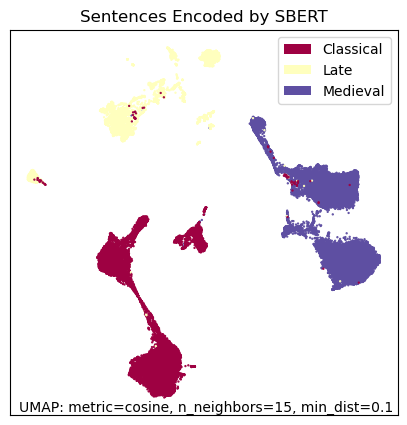

In [35]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Sentences Encoded by SBERT")
umap.plot.points(umap_embedding, labels=sents_df.age, ax=ax)
plt.savefig(os.path.join(os.getcwd(),"SBERT_umap_encodings.svg"),format="svg")

<Figure size 640x480 with 0 Axes>

## Plot the unseen test dataset

In [3]:
model = SentenceTransformer("./latin_sbert")

In [5]:
sents_df = data.load_data(os.path.join(os.getcwd(),"test_and_train_data"),return_sents=True)
sents_df.head()

Filename                       | Amount used | Amount Skipped
la_udante-ud-dev.conllu        :       376.0 :            1.0
la_udante-ud-test.conllu       :       419.0 :            0.0
la_udante-ud-train.conllu      :       926.0 :            0.0
la_ittb-ud-dev.conllu          :      2101.0 :          155.0
la_ittb-ud-test.conllu         :      2101.0 :          232.0
la_ittb-ud-train.conllu        :     22775.0 :         1668.0
la_llct-ud-dev.conllu          :       850.0 :           98.0
la_llct-ud-test.conllu         :       884.0 :          154.0
la_llct-ud-train.conllu        :      7289.0 :         1115.0
la_proiel-ud-dev.conllu        :      1233.0 :           14.0
la_proiel-ud-test.conllu       :      1260.0 :           30.0
la_proiel-ud-train.conllu      :     16196.0 :          758.0
la_perseus-ud-test.conllu      :       939.0 :            4.0
la_perseus-ud-train.conllu     :      1334.0 :           10.0
EvaLatin_2024_poetry_test_data.conllu :       555.0 :            1.0
E

,sent,author,age,conllus
0,Reverendissimo in Christo patri dominorum suor...,Dante,Medieval,"[{'id': 1, 'form': 'Reverendissimo', 'lemma': ..."
1,Preceptis salutaribus moniti et Apostolica pie...,Dante,Medieval,"[{'id': 1, 'form': 'Preceptis', 'lemma': 'prae..."
2,Et si negligentie sontes aut ignavie censeremu...,Dante,Medieval,"[{'id': 1, 'form': 'Et', 'lemma': 'et', 'upos'..."
3,Ceu filii non ingrati litteras igitur pie vest...,Dante,Medieval,"[{'id': 1, 'form': 'Ceu', 'lemma': 'ceu', 'upo..."
4,"Nam quam, fere pre desiderio sompniantes, inhi...",Dante,Medieval,"[{'id': 1, 'form': 'Nam', 'lemma': 'nam', 'upo..."


In [6]:
sents = sents_df.sent
print(sents)

0        Reverendissimo in Christo patri dominorum suor...
1        Preceptis salutaribus moniti et Apostolica pie...
2        Et si negligentie sontes aut ignavie censeremu...
3        Ceu filii non ingrati litteras igitur pie vest...
4        Nam quam, fere pre desiderio sompniantes, inhi...
                               ...                        
55292    Fennis mira feritas foeda paupertas non arma n...
55293    idemque uenatus uiros pariter ac feminas alit ...
55294    nec aliud infantibus ferarum imbriumque suffug...
55295    sed beatius arbitrantur quam ingemere agris il...
55296    cetera iam fabulosa Hellusios et Oxionas ora h...
Name: sent, Length: 55297, dtype: object


In [7]:
sent_embeddings = model.encode(sents)

In [10]:
len(sent_embeddings)

853

In [10]:
umap_embedding = umap.UMAP(n_components=2, metric='cosine').fit(sent_embeddings)

In [12]:
umap_embedding.embedding_.shape

(853, 2)

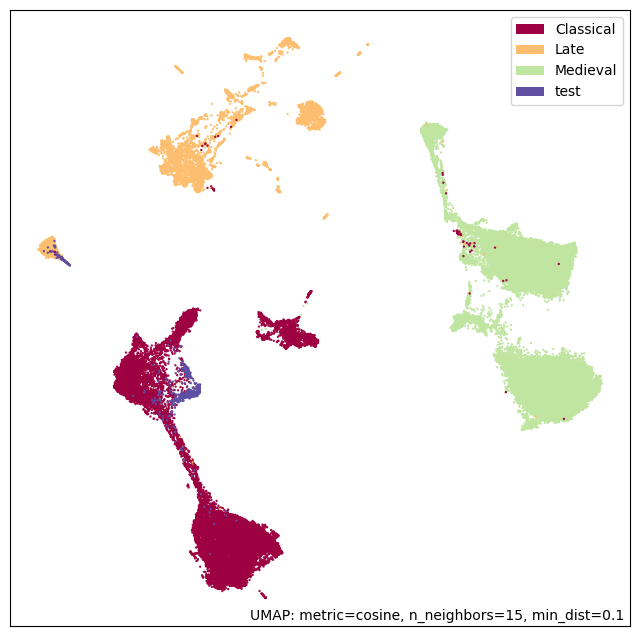

In [11]:
f = umap.plot.points(umap_embedding, labels=sents_df.age)